## **Project 2 Part 3**

### **Task**
-  clean and explore the approved data set
- Exploratory data analysis

**Things to do:**

Basics:
1. Deleted unnecessary columns.
2. Deleted duplicate rows.
3. Identified and addressed missing values.
4. Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
5. Identified outliers.

Exploratory Data analysis (EDA)

1. Produced univariate visuals for the target and all features.
2. Produce multivariate visuals
3. Draw correlational heatmap
4. Trendline visualizations 

In [2]:
#Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the dataset
df =  pd.read_csv(r"C:\Users\USER\Desktop\Crude oil.csv")

In [4]:
#view the first rows of the dataset
df.head()

,ID,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,ID_000000,2019-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,5010.0,6541.0
1,ID_000001,2019-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,4810.0,6492.0
2,ID_000002,2019-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,4733.0,6448.0
3,ID_000003,2019-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,4227.0,5932.0
4,ID_000004,2019-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,3841.0,5604.0


In [5]:
#View the number of rows and columns in the dataset.
print(f"There are {df.shape[0]} rows, and {df.shape[1]} columns")

There are 27500 rows, and 30 columns


## Duplicated Rows

In [6]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


## Columns display

In [7]:
## Display column names
df.columns

Index(['ID', 'time', 'generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [8]:
import datetime
df ["time"] = pd.to_datetime(df["time"], errors='coerce')
df ["Year"] = df["time"].dt.year
df ["Month"] = df["time"].dt.month
df ["Day"] = df["time"].dt.day
df ["Hour"] = df["time"].dt.hour

Datetime was imported to split the timeset in the data so that the algorithm can work with well and predict accurately

In [9]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,Year,Month,Day,Hour
count,27482.00000,27483.000000,27483.0,27483.000000,27483.000000,27482.000000,27483.0,27483.0,27483.0,0.0,...,0.0,27500.000000,27500.000000,27466.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000
mean,396.78022,476.247098,0.0,5555.281119,4411.479242,303.007059,0.0,0.0,0.0,NaN,...,NaN,5469.240545,28639.632291,28621.754715,4764.150436,5610.960327,2020.086982,6.298945,15.644436,11.498545
std,88.97453,363.187665,0.0,2252.850015,2015.548483,53.850784,0.0,0.0,0.0,NaN,...,NaN,3179.516247,4600.880403,4577.680533,1432.890512,1424.710564,0.896392,3.534103,8.792006,6.921752
min,0.00000,0.000000,0.0,1518.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,NaN,237.000000,18105.000000,18041.000000,206.000000,933.000000,2019.000000,1.000000,1.000000,0.000000
25%,340.00000,0.000000,0.0,4069.000000,2618.000000,267.000000,0.0,0.0,0.0,NaN,...,NaN,2976.000000,24712.750000,24724.000000,3994.000000,4783.000000,2019.000000,3.000000,8.000000,5.000000
50%,376.00000,558.000000,0.0,4871.000000,4698.000000,303.000000,0.0,0.0,0.0,NaN,...,NaN,4856.000000,28848.500000,28839.500000,4835.000000,5610.500000,2020.000000,6.000000,16.000000,11.000000
75%,475.00000,856.000000,0.0,6269.000000,6062.500000,336.000000,0.0,0.0,0.0,NaN,...,NaN,7365.250000,32151.000000,32082.750000,5700.000000,6530.250000,2021.000000,9.000000,23.000000,17.000000
max,592.00000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,NaN,17430.000000,41390.000000,41015.000000,10199.000000,11680.000000,2022.000000,12.000000,31.000000,23.000000


## Missing Values

In [10]:
print(f" There are {df.isna().sum()} missing values in the dataset")

 There are ID                                                 0
time                                               0
generation biomass                                18
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     27500
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable         

In [11]:
print(f" There are {df.isna().sum()/len(df)*100} missing values in the dataset")

 There are ID                                               0.000000
time                                             0.000000
generation biomass                               0.065455
generation fossil brown coal/lignite             0.061818
generation fossil coal-derived gas               0.061818
generation fossil gas                            0.061818
generation fossil hard coal                      0.061818
generation fossil oil                            0.065455
generation fossil oil shale                      0.061818
generation fossil peat                           0.061818
generation geothermal                            0.061818
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.065455
generation hydro run-of-river and poundage       0.065455
generation hydro water reservoir                 0.061818
generation marine                                0.065455
generation nuclear                               0.058182
gen

### **Delete unneccessary columns**

Variable columns with missing data more than 70% will be dropped. Also variable that has 0.1- 0.3 correction with the target variable will be dropped

In [12]:
df.drop(["ID", "generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"], axis = 1, inplace = True)

In [13]:
df.drop(["generation geothermal", "generation fossil peat", "generation fossil oil shale", "generation wind offshore"], axis = 1, inplace = True)

In [14]:
df.drop(["generation marine", "generation fossil brown coal/lignite", "generation fossil coal-derived gas", "time"], axis = 1, inplace = True)

## Outliers

from the descriptive analysis of the data, I found out that there are outliers in the variable columns. Exploratory analysis of columns will be done

In [15]:
def remove_outliers(df, columns, threshold=3):
    # Create a copy of the DataFrame to work with
    df_cleaned = df.copy()

    # Loop through the specified columns
    for col in columns:

        # Calculate the z-score for each value in the column
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

        # Identify the outliers using the specified threshold
        outliers = z_scores > threshold

        # Replace the outliers with NaN
        df_cleaned[col][outliers] = np.nan

    # Drop any rows with NaN values
    df_cleaned = df_cleaned.dropna()

    return df_cleaned

In [16]:
cleaned_df = remove_outliers(df, ['generation biomass','generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead'], threshold=2.5)

C:\Users\USER\AppData\Local\Temp\ipykernel_9896\1626267073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col][outliers] = np.nan


Remove outliers from multiple columns in a Pandas DataFrame using the z-score method.
  Parameters:
    - df: a Pandas DataFrame
    - columns: a list of column names to remove outliers from
    - threshold: the z-score threshold to use for outlier removal. Default is 3.
 Returns:


## Exploratory Data Analysis

### **Correlational analysis (Heatmap)**

In [17]:
# calculate the correlation between each feature and the target variable
corr_with_target = df.corr()['price actual'].drop('price actual')

# select the columns to drop based on the correlation threshold
cols_to_drop = corr_with_target[abs(corr_with_target) < 0.3].index

# drop the columns from the dataframe
df = df.drop(cols_to_drop, axis=1)

print(df)

       generation fossil gas  generation fossil hard coal  \
0                     4844.0                       4821.0   
1                     5196.0                       4755.0   
2                     4857.0                       4581.0   
3                     4314.0                       4131.0   
4                     4130.0                       3840.0   
...                      ...                          ...   
27495                 7157.0                       4270.0   
27496                 7490.0                       4384.0   
27497                 7633.0                       4562.0   
27498                 8148.0                       4499.0   
27499                 8364.0                       4445.0   

       generation fossil oil  generation hydro pumped storage consumption  \
0                      162.0                                        863.0   
1                      158.0                                        920.0   
2                      157.0        

Correlation threshold used here was 0.3 because using 0.5 will remove most of the features.

I divided it as 
- 0.3 - 0.5 to have a fair correlation between the dataset 
- 0.5 - 0.7 to have a moderate correlation
- 0.7 - 1 to have a strong correlation

I then decided to plot the heatmap of the correlated features to the actual prices which is the target variable

<Axes: >

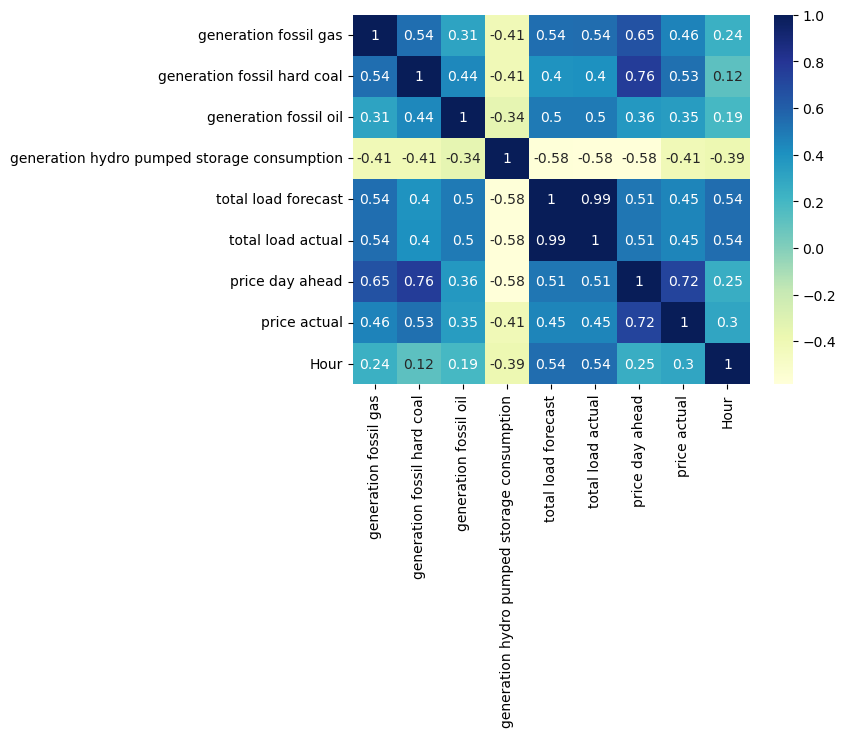

In [18]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
dataplot


This shows the heatmap of the correlated features

## **Scatter Plots**

In [19]:
#features = ["generation fossil gas", "generation fossil hard coal", "generation fossil oil", "generation hydro pumped storage consumption", "total load forecast", "total load actual", "price day ahead", "time"]
features = [0, 1, 2, 3, 4, 5, 6, 7]
target = "price actual"

In [20]:
print(len(features))

8


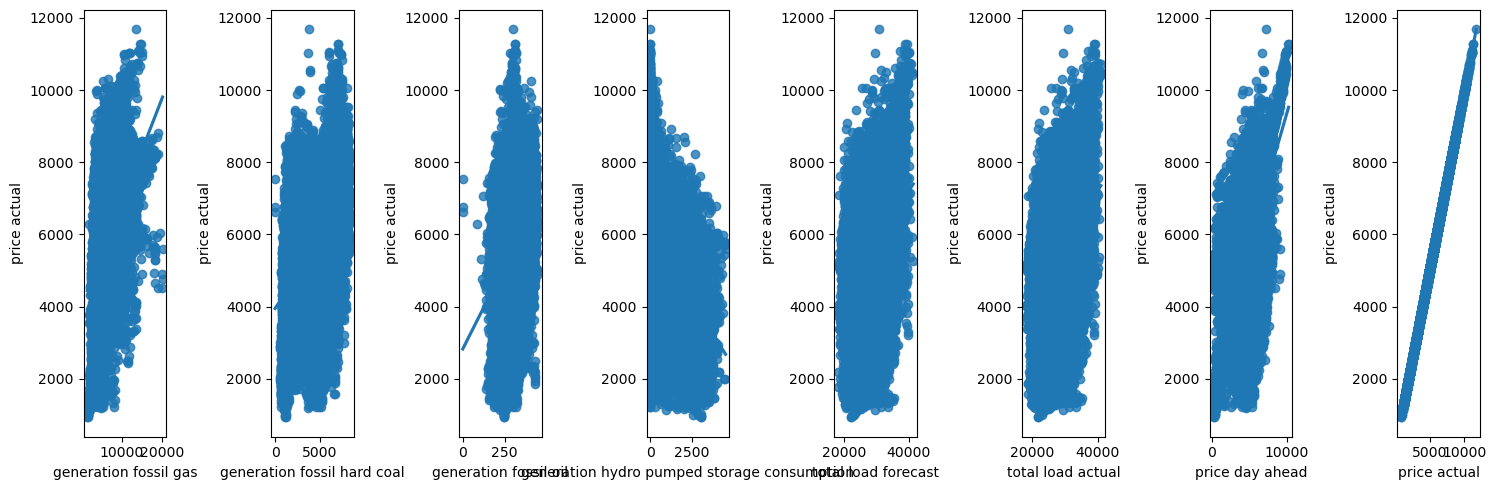

In [21]:
# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Plot the regression lines
for i, ax in enumerate(axes):
    if i < len(features):
        sns.regplot(x=df.iloc[:, features[i]], y=df[target], data=df, ax=ax)

# Show the plot
plt.tight_layout()
plt.show()

The scatter plot above shows that the target variable has positive correlation with all the features. These plots also shows the regression line the data. The plot shows there is a linear relationship between the variables

## **Unvariate Visualizations**

C:\Users\USER\AppData\Local\Temp\ipykernel_9896\2302617677.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["generation fossil gas"], kde = True, bins= 500)


<function matplotlib.pyplot.show(close=None, block=None)>

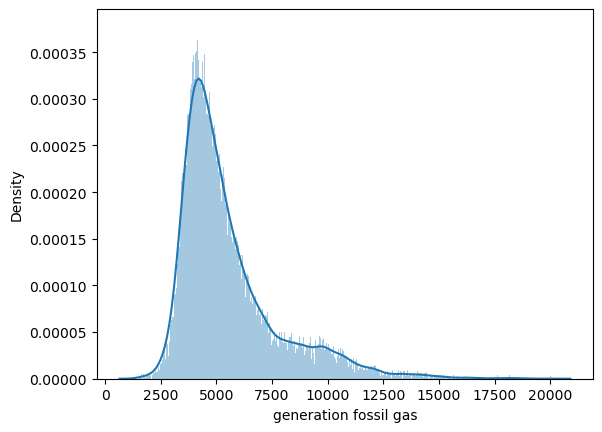

In [23]:
#distribution plot of generation biomass
sns.distplot(df["generation fossil gas"], kde = True, bins= 500)
plt.show

C:\Users\USER\AppData\Local\Temp\ipykernel_9896\1096748250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price actual"], kde = True, bins= 500)


<function matplotlib.pyplot.show(close=None, block=None)>

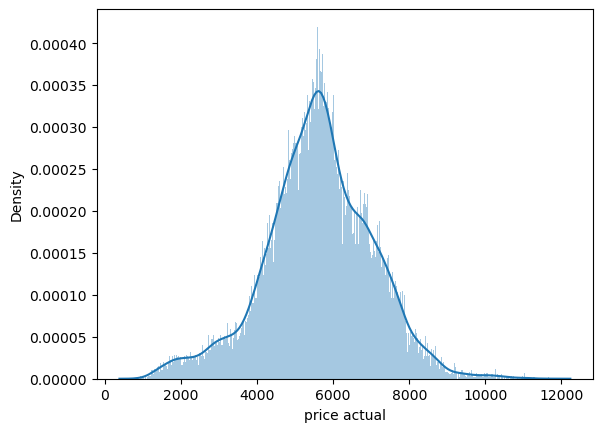

In [24]:
#distribution plot of generation fossil gas
sns.distplot(df["price actual"], kde = True, bins= 500)
plt.show

The distribution plot of generation fossil gas and price actual show a normal distribution but that generation fossil gas is skewed to the left

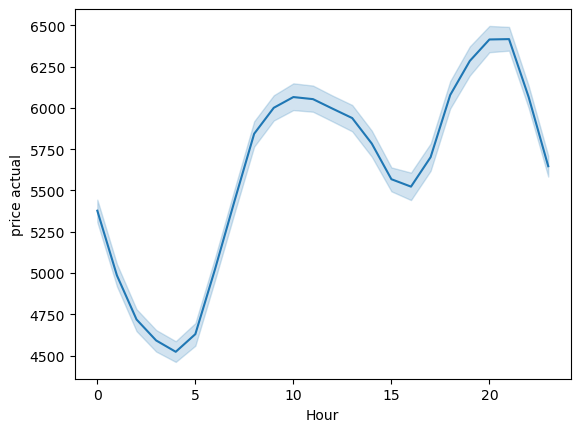

In [125]:
# Create line plot
sns.lineplot(x="Hour", y="price actual", data=df)

# Show plot
plt.show()


This is a line plot of the target variable and Hour features. this shows a progressive increase in price actual (target) with the hour. The higher the price actual, the higher the hour it takes to move up

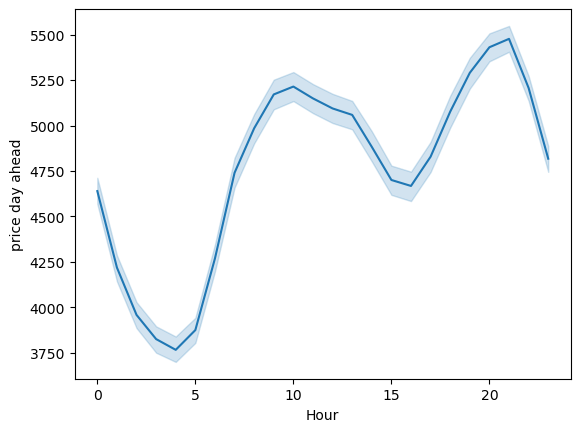

In [25]:
# Create line plot
sns.lineplot(x="Hour", y="price day ahead", data=df)

# Show plot
plt.show()

This is a line plot of the target variable and Hour features. this shows a progressive increase in price day ahead (target) with the hour. The higher the price day ahead, the higher hour it takes to move u

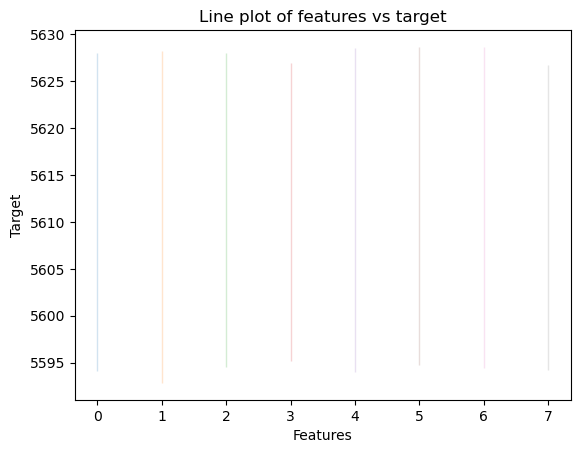

In [30]:
# create a line plot for each feature
for feature in features:
    sns.lineplot(x=feature, y=target, data=df)

# set the plot title and axis labels
plt.title('Line plot of features vs target')
plt.xlabel('Features')
plt.ylabel('Target')

# show the plot
plt.show()

The graph above shows the line plot of all the features. Although, the linechart was not disaplayed but it shows the dimentionality of the features to the target variables.